Premer grafa: 4
Iteracija: 3


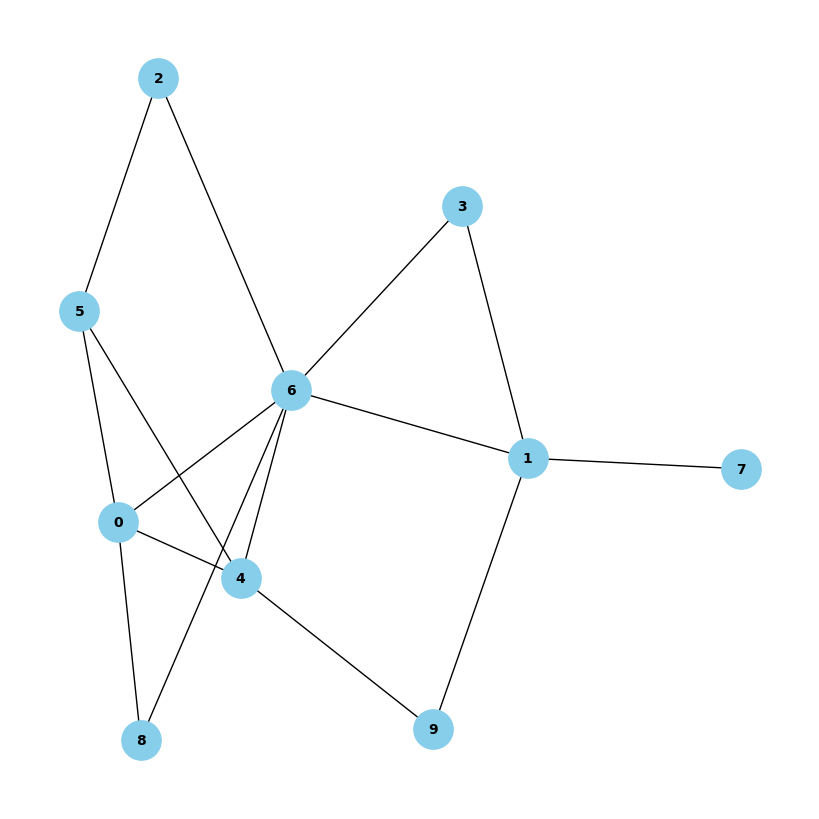

Premer zadnjega grafa: 4


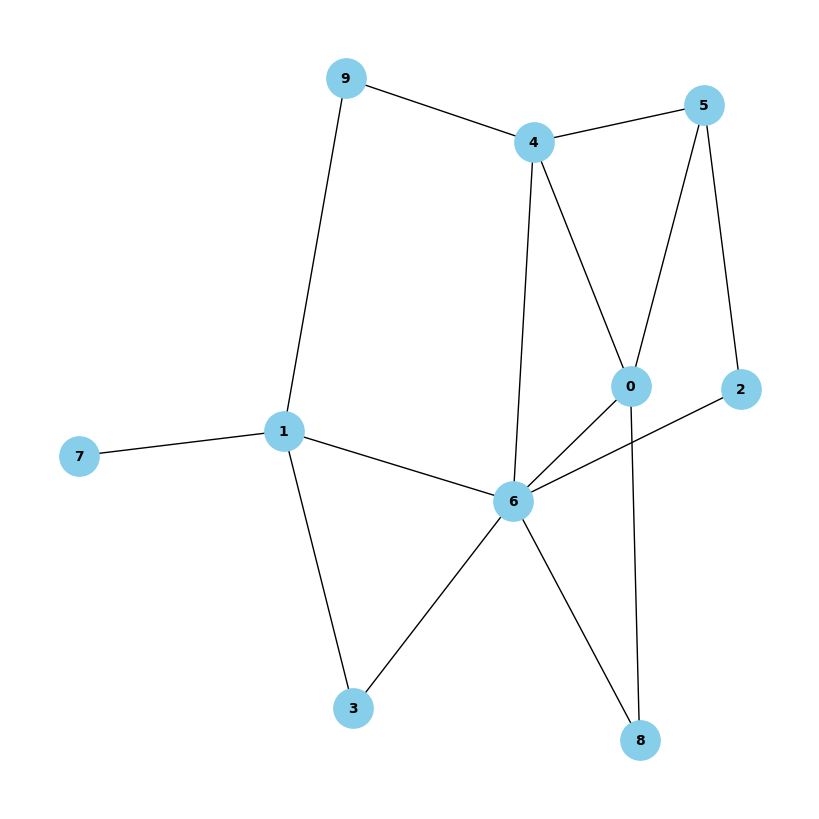

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G


def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota

def vsota_vseh_razdalj(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += vsota_razdalj(graf, n)
    return vsota

def iskanje_ravnotezja(n, e, max_iteracij):
    trenutna_resitev = nakljucni_zacetni_graf(n, e)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        # Izbere nakljucno drugo vozlisce in ga poveze z prvim
        vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
        nova_resitev.add_edge(vozlisce1, vozlisce2) 
        # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
        if nx.is_connected(nova_resitev):
            if vsota_razdalj(trenutna_resitev, vozlisce1) > vsota_razdalj(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
    return trenutna_resitev


st_vozlisc = 10
max_iteracij = 10
st_povezav = 15

zadnji_graf = iskanje_ravnotezja(st_vozlisc, st_povezav, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")


plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

Premer grafa: 3
Iteracija: 39
Graf je drevo, ni pa v sum ravnovesju


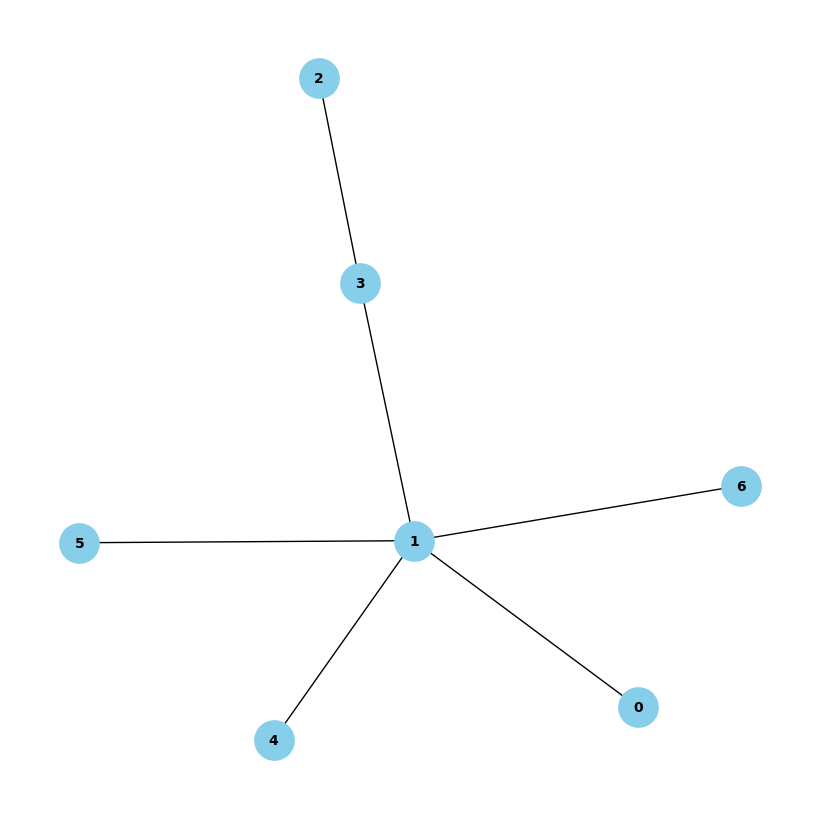

Premer grafa: 2
Iteracija: 63
Graf je drevo(zvezda) v sum ravnovesju


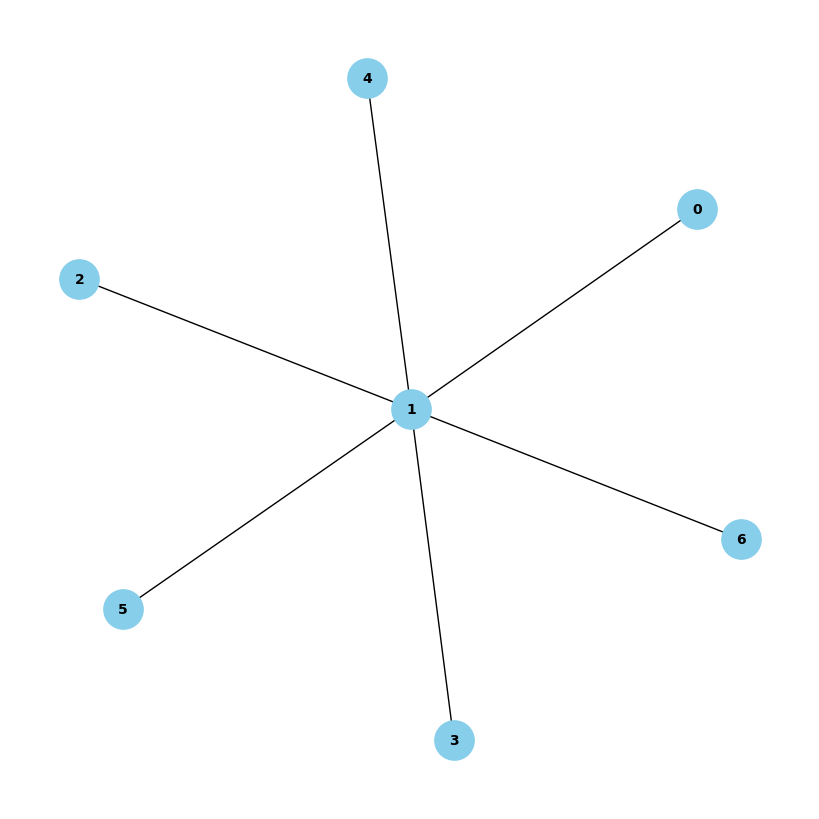

Premer zadnjega grafa: 2
Graf je drevo(zvezda) v sum ravnovesju


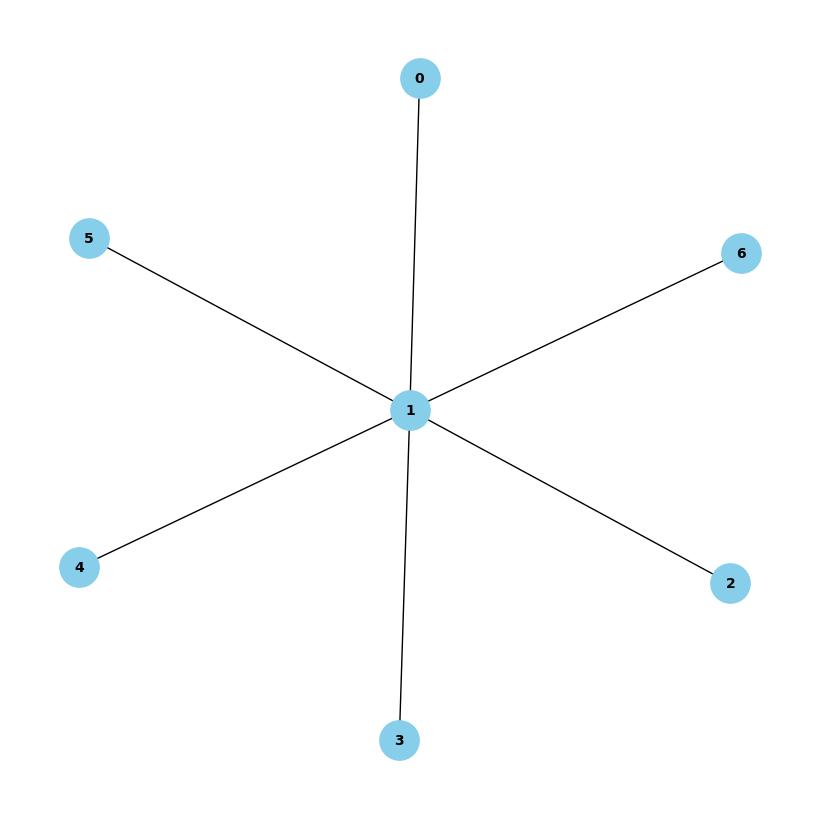

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def swap_equilibrium_sum_drevo(graf):
    if not nx.is_connected(graf):
        return 'Graf ni povezan in torej ni drevo v sum ravnovesju'
    elif len(graf.edges) == graf.number_of_nodes() - 1:
        if nx.diameter(graf) > 2:
            return 'Graf je drevo, ni pa v sum ravnovesju'
        elif nx.diameter(graf) == 2:
            return 'Graf je drevo(zvezda) v sum ravnovesju'
        else:
            return 'Graf je ?'
    else:
        return 'Graf ni drevo'

def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota


def iskanje_ravnotezja_drevo(n, max_iteracij):
    trenutna_resitev = nx.random_tree(n)
    for iteracija in range(max_iteracij):
        vozlisce1 = random.choice(list(trenutna_resitev.nodes))
        # Odstrani nakljucno povezavo prvega vozlisca
        povezave_vozlisca1 = list(trenutna_resitev.edges(vozlisce1))
        nakljucna_povezava = random.choice(povezave_vozlisca1)
        nova_resitev = trenutna_resitev.copy()
        nova_resitev.remove_edge(*nakljucna_povezava)
        # Izbere nakljucno drugo vozlisce in ga poveze z prvim
        vozlisce2 = random.choice(list(trenutna_resitev.nodes - set([vozlisce1])))
        nova_resitev.add_edge(vozlisce1, vozlisce2) 
        # Preveri ali je nova rešitev boljša za vozlišče 1, če je posodobi trenutno rešitev
        if nx.is_connected(nova_resitev):
            if vsota_razdalj(trenutna_resitev, vozlisce1) > vsota_razdalj(nova_resitev, vozlisce1):
                trenutna_resitev = nova_resitev.copy()
                print(f"Premer grafa: {nx.diameter(trenutna_resitev)}")
                print(f"Iteracija: {iteracija}")
                print(f"{swap_equilibrium_sum_drevo(trenutna_resitev)}")
                plt.figure(figsize=(8, 8))
                nx.draw(trenutna_resitev, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
                plt.show()
    return trenutna_resitev


st_vozlisc = 7
max_iteracij = 100


zadnji_graf = iskanje_ravnotezja_drevo(st_vozlisc, max_iteracij)
print(f"Premer zadnjega grafa: {nx.diameter(zadnji_graf)}")
print(f"{swap_equilibrium_sum_drevo(zadnji_graf)}")

plt.figure(figsize=(8, 8))
nx.draw(zadnji_graf, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()

In [4]:
def vsota_razdalj(graf, vozlisce):
    vsota = 0
    for v in graf.nodes - {vozlisce}:
        vsota += nx.shortest_path_length(graf, vozlisce, v)
    return vsota

def potratno_ravnovesje_sum(graf):
    for v1 in graf.nodes:
        for p in list(graf.edges(v1)):
            for v2 in graf.nodes - {v1}:
                testni_graf = graf.copy()
                testni_graf.remove_edge(*p)
                testni_graf.add_edge(v1, v2)
                if nx.is_connected(testni_graf):
                    if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                        return f"Ni sum ravnovesje, vozlišču {v1} se splača zamenjati povezavo {p} z povezavo {v1, v2}"
    return 'Je ravnovesje'

potratno_ravnovesje_sum(zadnji_graf)


'Ni sum ravnovesje, vozlišču 0 se splača zamenjati povezavo (0, 6) z povezavo (0, 1)'

1
3
Je ravnovesje
Premer zadnjega grafa: 2


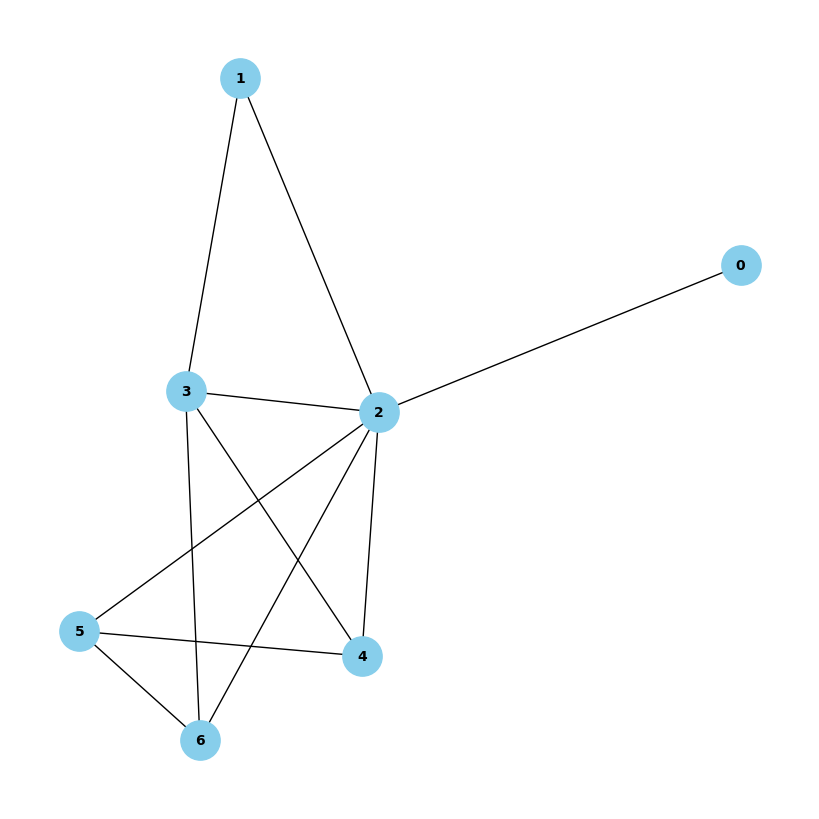

NodeView((0, 1, 2, 3, 4, 5, 6))

In [11]:
def nakljucni_zacetni_graf(n, e):
    # Create an initial random graph with the specified number of nodes
    G = nx.gnm_random_graph(n, e)
    # Ensure the graph is connected
    while not nx.is_connected(G):
        G = nx.gnm_random_graph(n, e)
    return G

def ekzaktno_sum(n, e):
    graf = nakljucni_zacetni_graf(n, e)
    
    def loop_sum(graf):
        ravnovesni_graf = graf.copy()
        for v1 in graf.nodes:
            preostale_povezave = list(graf.edges(v1))
            for p in list(graf.edges(v1)):
                preostale_povezave.remove(p)
                for v2 in graf.nodes - {v1}:
                    testni_graf = graf.copy()
                    testni_graf.remove_edge(*p)
                    testni_graf.add_edge(v1, v2)
                    if v1 == n - 1 and v2 == n - 2 and not preostale_povezave:
                        if nx.is_connected(testni_graf) and vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                            ravnovesni_graf = testni_graf.copy()
                            print('2')
                            return loop_sum(ravnovesni_graf)
                        else:
                            print('3')
                            return ravnovesni_graf
                    else:
                        if nx.is_connected(testni_graf):
                            if vsota_razdalj(graf, v1) > vsota_razdalj(testni_graf, v1):
                                ravnovesni_graf = testni_graf.copy()
                                print('1')
                                return loop_sum(ravnovesni_graf)
        
    
    return loop_sum(graf)

opti = ekzaktno_sum(7, 11)
print(potratno_ravnovesje_sum(opti))
print(f"Premer zadnjega grafa: {nx.diameter(opti)}")
plt.figure(figsize=(8, 8))
nx.draw(opti, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

Je ravnovesje
Premer zadnjega grafa: 3
96


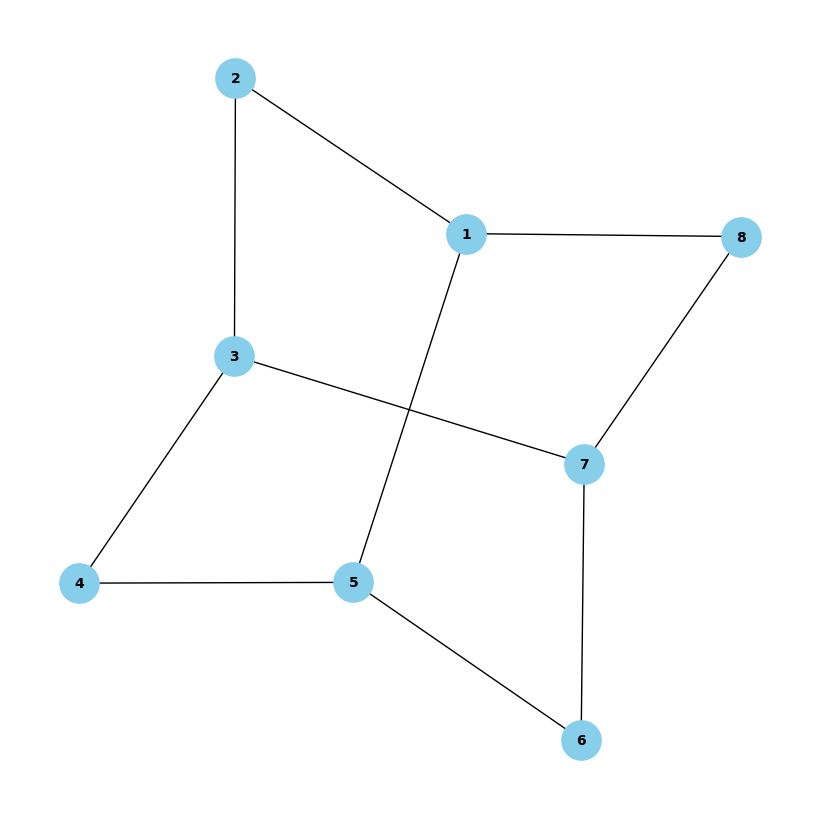

NodeView((0, 1, 2, 3, 4, 5, 6))

In [12]:
def vsota_vseh_razdalj(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += vsota_razdalj(graf, n)
    return vsota

G = nx.Graph()
vertices = range(1, 9)
G.add_nodes_from(vertices)
edges = [
    (1, 2), (2, 3), (3, 4),
    (4, 5), (5, 6), (6, 7),
    (7, 8), (1, 5), (3, 7),
    (8, 1)
]
G.add_edges_from(edges)

print(potratno_ravnovesje_sum(G))
print(f"Premer zadnjega grafa: {nx.diameter(G)}")
print(vsota_vseh_razdalj(G))
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

Je ravnovesje
Premer zadnjega grafa: 3
96


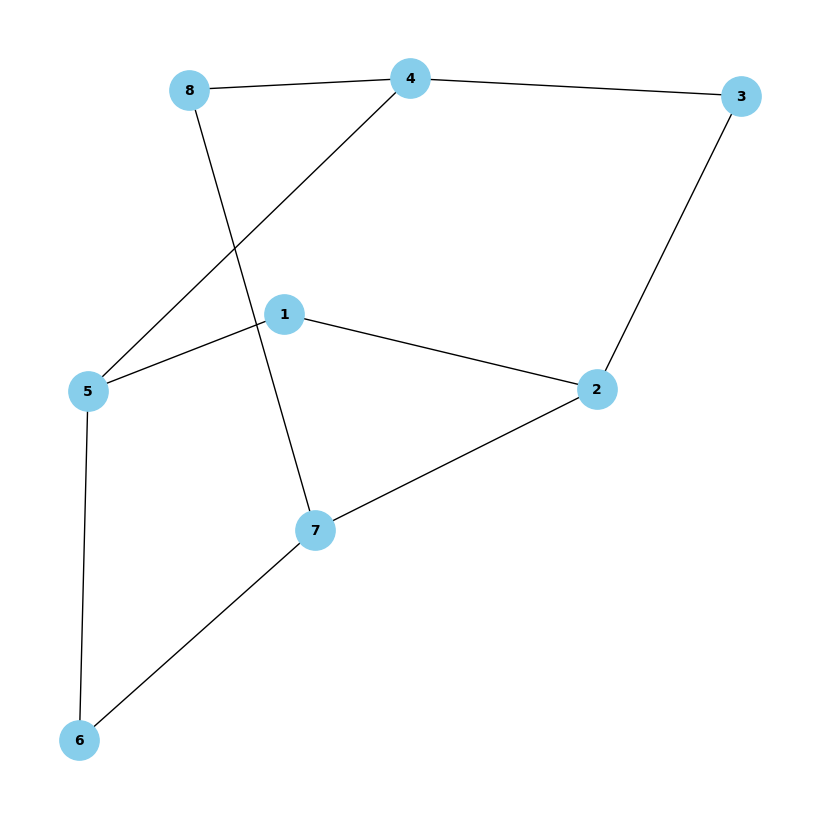

NodeView((0, 1, 2, 3, 4, 5, 6))

In [13]:
G = nx.Graph()
vertices = range(1, 9)
G.add_nodes_from(vertices)
edges = [
    (1, 2), (2, 3), (3, 4),
    (4, 5), (5, 6), (6, 7),
    (7, 8), (1, 5), (2, 7),
    (4, 8)
]
G.add_edges_from(edges)

print(potratno_ravnovesje_sum(G))
print(f"Premer zadnjega grafa: {nx.diameter(G)}")
print(vsota_vseh_razdalj(G))
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

Je ravnovesje
Premer zadnjega grafa: 3
100


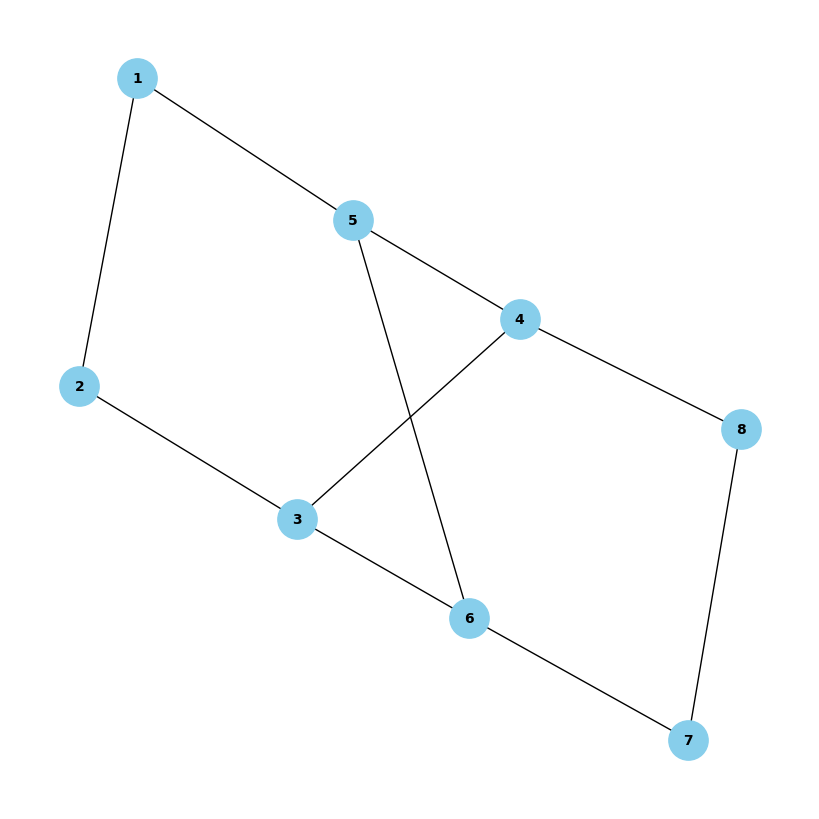

NodeView((0, 1, 2, 3, 4, 5, 6))

In [14]:
G = nx.Graph()
vertices = range(1, 9)
G.add_nodes_from(vertices)
edges = [
    (1, 2), (2, 3), (3, 4),
    (4, 5), (5, 6), (6, 7),
    (7, 8), (1, 5), (3, 6),
    (4, 8)
]
G.add_edges_from(edges)

print(potratno_ravnovesje_sum(G))
print(f"Premer zadnjega grafa: {nx.diameter(G)}")
print(vsota_vseh_razdalj(G))
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

Je ravnovesje
Premer zadnjega grafa: 2
92


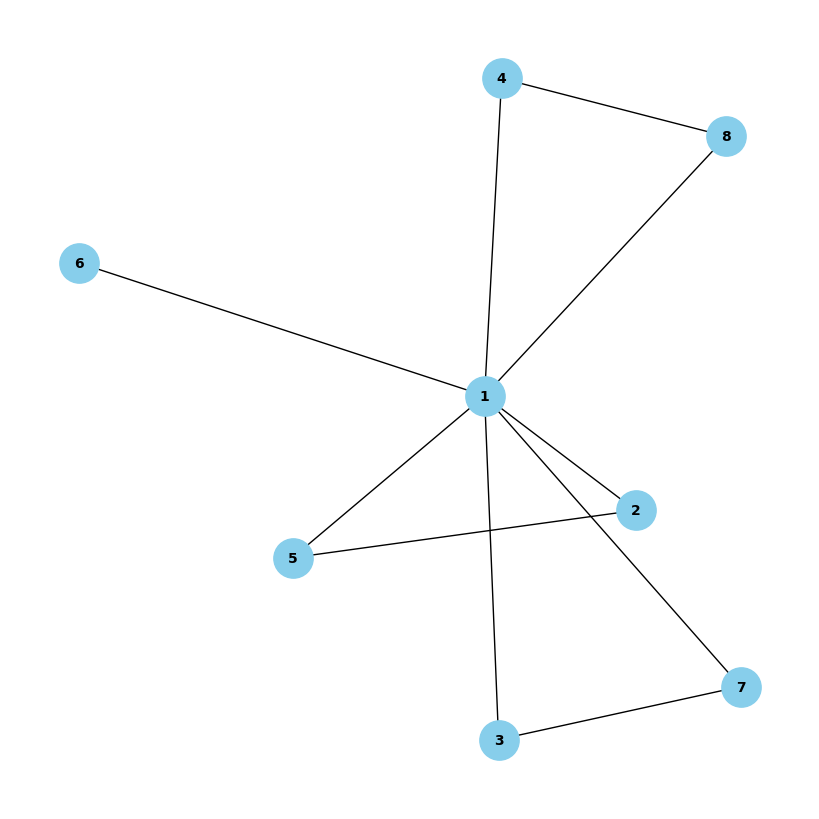

NodeView((0, 1, 2, 3, 4, 5, 6))

In [20]:
G = nx.Graph()
vertices = range(1, 9)
G.add_nodes_from(vertices)
edges = [
    (1, 2), (1, 3), (1, 4),
    (1, 5), (1, 6), (1, 7),
    (1, 8), (2, 5), (3, 7),
    (4, 8)
]
G.add_edges_from(edges)

print(potratno_ravnovesje_sum(G))
print(f"Premer zadnjega grafa: {nx.diameter(G)}")
print(vsota_vseh_razdalj(G))
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()
opti.nodes()

Je ravnovesje
Premer zadnjega grafa: 3
94


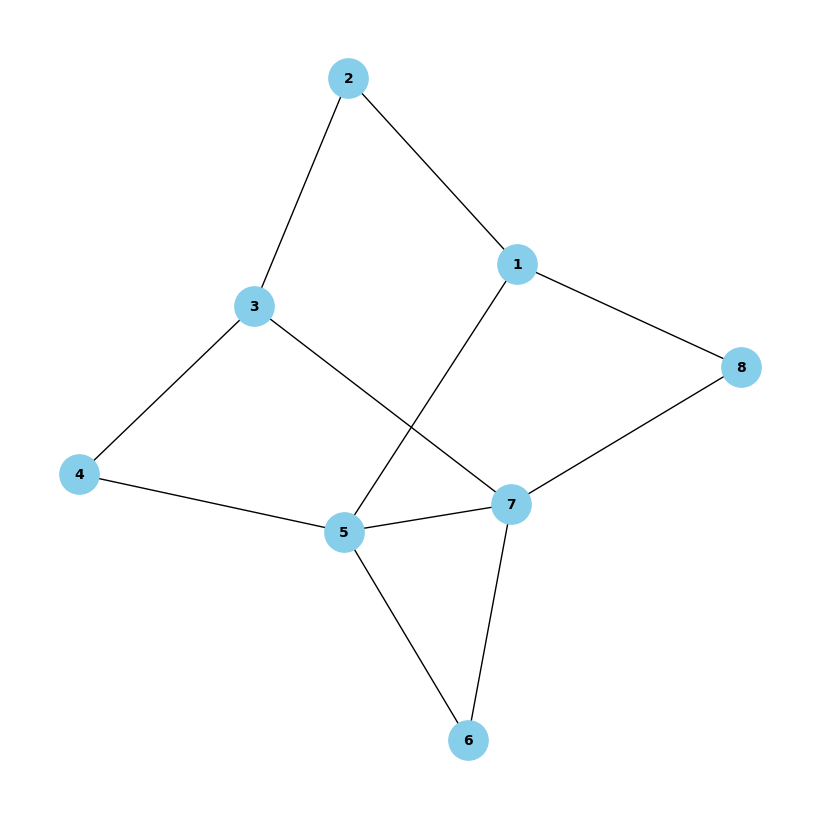

In [8]:
def vsota_vseh_razdalj(graf):
    vsota = 0
    for n in graf.nodes:
        vsota += vsota_razdalj(graf, n)
    return vsota

G = nx.Graph()
vertices = range(1, 9)
G.add_nodes_from(vertices)
edges = [
    (1, 2), (2, 3), (3, 4),
    (4, 5), (5, 6), (6, 7),
    (7, 8), (1, 5), (3, 7),
    (8, 1), (5, 7)
]
G.add_edges_from(edges)

print(potratno_ravnovesje_sum(G))
print(f"Premer zadnjega grafa: {nx.diameter(G)}")
print(vsota_vseh_razdalj(G))
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=10)
plt.show()